In [1]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv('C:/Users/navee/OneDrive/Desktop/VINAUDIT/model_prediction1.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,year,make,model,listing_mileage,dealer_state,listing_price
0,2017,9,99,99697.0,56,32999.0
1,2014,13,123,142650.0,7,22995.0
2,2013,2,7,106644.0,46,16995.0
3,2013,11,103,112654.0,21,12495.0
4,2013,10,80,161350.0,21,14995.0
...,...,...,...,...,...,...
408657,2016,5,101,91029.0,32,29175.0
408658,2022,9,113,3949.0,18,30689.0
408659,2017,7,65,76801.0,26,16900.0
408660,2020,5,19,925.0,34,55995.0


<Axes: ylabel='listing_price'>

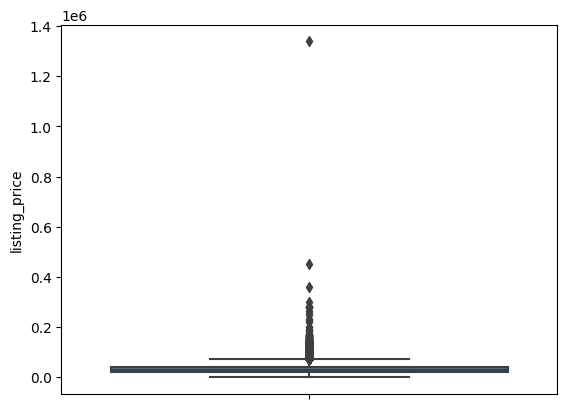

In [3]:
sns.boxplot(y=data['listing_price'])

In [4]:
data = data[data['listing_price'] < 30000]
data

,year,make,model,listing_mileage,dealer_state,listing_price
1,2014,13,123,142650.0,7,22995.0
2,2013,2,7,106644.0,46,16995.0
3,2013,11,103,112654.0,21,12495.0
4,2013,10,80,161350.0,21,14995.0
5,2002,10,16,201635.0,46,4995.0
...,...,...,...,...,...,...
408653,2019,10,25,55549.0,45,29117.0
408655,2021,19,97,40196.0,56,25090.0
408656,2020,5,68,45119.0,29,25500.0
408657,2016,5,101,91029.0,32,29175.0


In [5]:
data.corr() #checking for corelation between features

,year,make,model,listing_mileage,dealer_state,listing_price
year,1.000000,0.080304,-0.028945,-0.691418,-0.022498,0.683527
make,0.080304,1.000000,0.024045,-0.067572,-0.003721,0.054001
model,-0.028945,0.024045,1.000000,0.040277,0.009939,-0.031765
listing_mileage,-0.691418,-0.067572,0.040277,1.000000,0.021996,-0.633980
dealer_state,-0.022498,-0.003721,0.009939,0.021996,1.000000,0.000006
listing_price,0.683527,0.054001,-0.031765,-0.633980,0.000006,1.000000


# **Linear Regression**

In [6]:
#splitting the data into dependant and independant features
x = data.iloc[:,0:5].values
y = data.iloc[:,-1].values
x

array([[2.01400e+03, 1.30000e+01, 1.23000e+02, 1.42650e+05, 7.00000e+00],
       [2.01300e+03, 2.00000e+00, 7.00000e+00, 1.06644e+05, 4.60000e+01],
       [2.01300e+03, 1.10000e+01, 1.03000e+02, 1.12654e+05, 2.10000e+01],
       ...,
       [2.02000e+03, 5.00000e+00, 6.80000e+01, 4.51190e+04, 2.90000e+01],
       [2.01600e+03, 5.00000e+00, 1.01000e+02, 9.10290e+04, 3.20000e+01],
       [2.01700e+03, 7.00000e+00, 6.50000e+01, 7.68010e+04, 2.60000e+01]])

In [7]:
#splitting the data into testing and training phase
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=41)
print("Training Data Shape:",train_x.shape,train_y.shape,test_x.shape,test_y.shape)



Training Data Shape: (142762, 5) (142762,) (61185, 5) (61185,)


In [8]:
#performing linear regression
lgr = LinearRegression(fit_intercept=True)
data_fit = lgr.fit(train_x,train_y)
data_predict = lgr.predict(test_x)


In [9]:
#Calculate r2_score
from sklearn.metrics import r2_score
print(r2_score(test_y,data_predict))

0.5152799144364208


In [10]:
data_common = pd.DataFrame()
data_common['old_data'] = test_y
data_common['new_data'] = data_predict
data_common.to_csv('line_plot.csv')

In [11]:
data_common

,old_data,new_data
0,21450.0,24420.243207
1,22390.0,24449.531563
2,23754.0,24612.933552
3,27985.0,19389.384019
4,26994.0,24517.899948
...,...,...
61180,25495.0,23265.243120
61181,29480.0,24588.372485
61182,16992.0,20609.035910
61183,27750.0,23075.870041


In [12]:
import plotly.express as px
px.line(x = test_y, y = data_predict)

In [13]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y,data_predict)
print(mse)

19421339.803227965


# **Saving ML Model**

In [14]:
#saving the pickle file
from joblib import parallel,delayed
import joblib

#dumping pickle file
joblib.dump(lgr,'lgr')

#saving pickle file
lgr_pickle=joblib.load('lgr')

#testing pickle file
lgr_pickle.predict(test_x)


array([24420.2432067 , 24449.53156262, 24612.93355203, ...,
       20609.03591034, 23075.87004066,  4002.12064753])

In [15]:
#saving the pickle file
from joblib import parallel,delayed
import joblib

#dumping pickle file
joblib.dump(lgr,'lgr.pkl')

#saving pickle file
lgr_pickle=joblib.load('lgr.pkl')

#testing pickle file
lgr_pickle.predict(test_x)

array([24420.2432067 , 24449.53156262, 24612.93355203, ...,
       20609.03591034, 23075.87004066,  4002.12064753])